#### 第四章 神经网络的学习

##### 数据驱动的基本思路与损失函数

##### 数据驱动的基本思路

我们先用一个不严谨的例子，对数据学习有一点感性上的认识

假设有 Y = AX + B

我们已知X，Y的值，求A，B的值

思路为：
##### 第一步：训练

$Y_{p1}$ 为 $Y_{predict}$的简写，是训练的预测值

随机给一个 $A_1$, $B_1$, 就算出$Y_{p1}$，得到与正确预测的差值$|Y - Y_{p1}|$

调整权重为 $A_2$, $B_2$，得到预测值$Y_{p2}$，并有$|Y - Y_{p2}| < |Y - Y_{p1}|$ 

重复以上步骤

直到$|Y - Y_{pn}|$变得最小

这时的$A_n$, $B_n$就是我们要找的参数

##### 第二步：测试 $Y = A_n * X + B_n$

再来一组已知数据 $X_2$，$Y_2$，

测试$|Y_2 - Y_{p2}|$以判断函数准确性

##### 基本概念的引入

可见在这个过程中，我们只需要知道X的数据，Y的数据，而二者之间的关系，则由机器自动推算出来

其中$X_1$, $Y_1$为训练数据

$X_2$, $Y_2$为测试数据

$|Y_{1} - Y_{p}|$为损失函数(loss function)


##### 传统思维方法、机器学习与神经网络（深度学习）的区别

![从人工设计规则转变为友机器从数据中学习](./asset/图4-2人工到机器学习的转变.jpg)

神经网络的优点是对所有的问题都可以用同样的流程来解决

比如，不管要求解的问题是识别5，还是识别狗，亦或者是识别人脸，神经网络都是通过不断地学习所提供的数据，尝试发现待求解的问题的模式。

也就是说，与待处理的问题无关，神经网络可以讲数据直接作为原始数据，进行“端到端”的学习

##### 训练数据与测试数据

机器学习中，一般讲数据分为训练数据和测试数据两部分来进行学习和实验等。

首先，使用训练数据进行学习，寻找最优参数；

然后，使用测试数据评价训练得到的模型的实际能力

为什么需要讲数据分为训练数据和测试数据呢？

因为我们追求的是模型的泛化能力。

为了正确评价模型的泛化能力，就必须划分训练数据和测试数据。

另外，训练数据也可以称为监督数据。

##### 泛化能力

泛化能力是指处理未被观察过的数据（不包含在训练数据中的数据）的能力。

获得泛化能力是机器学习的最终目的。

比如，在识别手写数字的问题中，泛化能力可能会被用在自动读取明信片的邮政编码的系统上。

此时，手写数字识别就必须具备较高的识别“某个人”写的字的能力。

注意这里不是“特定的某个人写的特定的文字”，而是“任意一个人写的任意文字”。

如何系统只能识别已有的训练数据，那有可能是只学习了训练数据中的个人的习惯写法。

因此，仅仅用一个数据集去学习和评价参数，是无法进行正确评价的。

这样会导致可以顺利地处理某个数据集，但无法处理其他数据集的情况。

##### 过拟合

顺便说一下，只对某个数据集过度拟合的状态称为过拟合（over fitting）。

避免过拟合也是机器学习的一个重要课题。

##### 损失函数

神经网络的学习通过某个指标表示现在的状态

以这个指标为基准，寻找最优权重参数

神经网络以某个指标为线索寻找最优权重参数

神经网络的学习中所用的指标称为损失函数（loss function）

损失函数（loss function）是表示神经网络性能的“恶劣程度”的指标

即当前的神经网络对监督数据在多大程度上不拟合，在多大程度上不一致

这个损失函数可以使用任意函数，但一般用均方误差和交叉熵误差等。

##### 损失函数1：均方误差

可以用作损失函数的函数有很多，其中最知名的是均方误差（mean squared error）

$$E = \frac{1}{2}\sum(y_k - t_k)^2$$

这里，$y_k$是表示神经网络的输出，$t_k$表示监督数据，$k$表示数据的维数。

在手写数字识别的例子中，y与t是10个元素构成的数据。




In [9]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 
     0.1, 0.0, 0.1, 0.0, 0.0]

数组元素的索引从第一个开始依次对应数字“0”，“1”，“2” .......

这里，神经网络的输出y是softmax函数的输出

由于softmax函数的输出可以理解为概率

因此上例表示“0”的概率是0.1，“1”的概率是0.05，“2”的概率是0.6，以此类推

In [10]:
t = [0, 0, 1, 0, 0, 
     0, 0, 0, 0, 0]

t是监督数据，将正确解标签设为1，其他均设为0

这里，标签“2”为1，表示正确解是“2”

将正确解标签表示为1，其他标签表示为0的表示方式为one-hot表示

均方误差会计算神经网络的输出和正确解监督数据的各个元素之差的平方，再求总和

现在，我们用Python来实现这个均方误差，实现方法如下所示

In [11]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [16]:
import numpy as np

# 打印y中最大值的索引，即神经网络预测的最有可能的数字类别
print(np.argmax(y))  

print("MSE: 误差为")
mean_squared_error(np.array(y), np.array(t))

2
MSE: 误差为


np.float64(0.09750000000000003)

In [17]:
# t不变，定义y2（假设我又算出一组数）
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 
      0.1, 0.0, 0.6, 0.0, 0.0]

print(np.argmax(y2))

print("MSE: 误差为")
mean_squared_error(np.array(y2), np.array(t))

7
MSE: 误差为


np.float64(0.5975)

监督数据中的正确解为2

y中概率最大的值为2

y2中概率最大的解为7

相比之下，y的损失数值要小于y2的损失数值，从而y对应的权重更加吻合

##### 损失函数2:交叉熵误差

交叉熵误差（cross entropy error）是分类问题中常用的损失函数

交叉熵误差如下式所示：

$$E = -\sum t_k \log y_k$$

其中：
log表示以e为底数的自然对数ln

$y_k$是神经网络的输出

$t_k$是正确解标签，$t_k$中只有正确解标签的索引为1，其他均为0（one-hot形式）

因此，该式实际熵只计算对应正确解标签的输出的自然对数


/var/folders/fq/3pmzyx3s60l0sjm0lfcpdfhh0000gn/T/ipykernel_5681/3475502966.py:7: RuntimeWarning: divide by zero encountered in log
  y = -np.log(x)


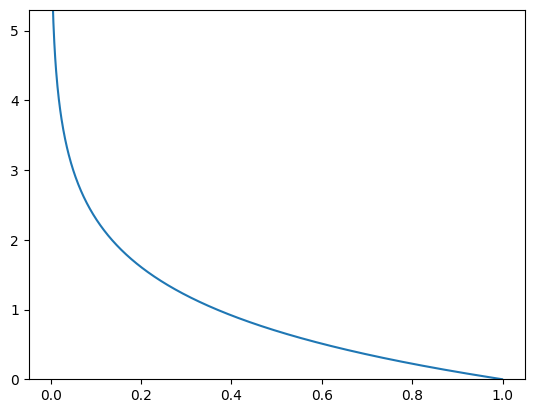

In [18]:
# 来看看-log(x)函数

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0., 1., 0.001)
y = -np.log(x)
plt.plot(x, y)
plt.ylim(0., 5.3)
plt.show()

比如，假设正确解标签的索引是“2”，与之对应的神经网络的输出是0.6

则交叉熵误差为$-log(0.6)$ = 0.5108

若“2”对应的输出是0.1，则交叉熵误差为$-log(0.1)$ = 2.3026

可见，交叉熵误差会随着输出值变小而变大

交叉熵误差可以像下面这样实现

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7 # 注意，1e，这里是数字
    return -np.sum(t * np.log(y + delta))

其中：
参数y和t是Numpy数组

函数内部再计算np.log时，加上一个微小值delta

这是因为，当出现np.log(0)时，np.log(0)会变为负无限大的-inf

这样一来就会导致后续计算无法进行

作为保护性政策，添加一个微小值可以防止负无限大的发生

下面，我们使用cross_entropy_error(y, t)进行一些简单的计算

In [20]:
y = [0.1, 0.05, 0.6, 0.0, 0.05,
     0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

np.float64(0.510825457099338)

In [21]:
y2 = [0.1, 0.05, 0.1, 0.0, 0.05,
     0.1, 0.0, 0.6, 0.0, 0.0]

cross_entropy_error(np.array(y2), np.array(t))

np.float64(2.302584092994546)

y中，正确解对应的值为0.6，交叉熵误差为0.5108

y2中，正确解对应的值为0.6，交叉熵误差为0.9163

由此可以看出，这些结果于我们前面讨论的内容是一致的

##### 损失函数3: mini-batch学习

前面介绍的损失函数的例子中考虑的都是针对单个数据的损失函数

如果要求所有训练数据的损失函数的总和，以交叉熵误差为例，可以写成如下形式：

$$E = -\frac{1}{N} \sum_{n} \sum_{k} t_{n,k} \log y_{n,k}$$

从训练数据中选出一小部分数据，如从60000中随机选择100个数据

再用这100个数据进行学习

这种方式称为mini-batch学习（主要是为了算得快）

下面我们用代码实现这个函数

In [ ]:
def cross_entropy_error(y, t):
    # 如果传入的t,y是1维数组的话，转换为2维数组
    # 这样做是为了兼容mini-batch的处理
    # 因为交叉熵计算是基于批量数据（二维数据），所以需要进行维度转换
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]

    # 1e-7是一个极小值，为了防止log(0)的情况出现
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

当y，t维度为1时，我们来看看函数发生了什么

In [23]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05,
               0.1, 0.0, 0.1, 0.0, 0.0])

t = np.array([0, 0, 1, 0, 0,
               0, 0, 0, 0, 0])

cross_entropy_error(y, t)

np.float64(0.510825457099338)

其中：

In [ ]:
# 将t转换为二维数组
t = t.reshape(1, t.size)
t

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# 将y转换为二维数组
y = y.reshape(1, y.size)
y

array([[0.1 , 0.05, 0.6 , 0.  , 0.05, 0.1 , 0.  , 0.1 , 0.  , 0.  ]])

In [26]:
batch_size = y.shape[0]
batch_size

1

In [27]:
delta = 1e-7
-np.sum(t * np.log(y + delta)) / batch_size

np.float64(0.510825457099338)

当y，t为多维时，我们来看看函数发生了什么？

In [28]:
y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
              [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
              [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0],
              [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]])

t = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])


cross_entropy_error(y, t)

np.float64(1.406704775046942)

其中，if不会执行

In [29]:
batch_size = y.shape[0]
batch_size

4

In [30]:
np.log(y + 1e-7)

array([[ -2.30258409,  -2.99573027,  -0.51082546, -16.11809565,
         -2.99573027,  -2.30258409, -16.11809565,  -2.30258409,
        -16.11809565, -16.11809565],
       [ -2.30258409,  -2.99573027,  -0.51082546, -16.11809565,
         -2.99573027,  -2.30258409, -16.11809565,  -2.30258409,
        -16.11809565, -16.11809565],
       [ -2.30258409,  -2.99573027,  -2.30258409, -16.11809565,
         -2.99573027,  -2.30258409, -16.11809565,  -0.51082546,
        -16.11809565, -16.11809565],
       [ -2.30258409,  -2.99573027,  -2.30258409, -16.11809565,
         -2.99573027,  -2.30258409, -16.11809565,  -0.51082546,
        -16.11809565, -16.11809565]])

In [32]:
t * np.log(y + 1e-7)

array([[-0.        , -0.        , -0.51082546, -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.51082546, -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -2.30258409, -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -2.30258409, -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ]])

In [33]:
-np.sum(t * np.log(y + 1e-7)) 

np.float64(5.626819100187768)

In [34]:
-np.sum(t * np.log(y + 1e-7)) / batch_size

np.float64(1.406704775046942)

当t为0-9的一个数字时，函数也可以写成一下形式

In [35]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [36]:
y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
              [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
              [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0],
              [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]])

t = np.array([2, 2, 2, 2])


cross_entropy_error(y, t)

np.float64(1.406704775046942)

In [37]:
batch_size = y.shape[0]
batch_size

4

In [38]:
np.arange(batch_size)

array([0, 1, 2, 3])

In [ ]:
## 这里的索引，取出y中(0, 2), (1, 2), (2, 2), (3, 2)位置的值

# y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
#               [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
#               [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0],
#               [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]])


y[np.arange(batch_size), t]

array([0.6, 0.6, 0.1, 0.1])